# Retrieval Practice and Learning

What is the most effective way to learn a subject? Many students focus exclusively on the _encoding_ process---that is, how to get the knowledge into memory in the first place. For example, taking notes is an activity for encoding knowledge.

_Retrieval_, on the other hand, is the process of reconstructing that knowledge from memory. [Karpicke and Blunt](http://science.sciencemag.org/content/331/6018/772) (2011) demonstrated that _retrieval_ is more effective for learning than activites designed to promote effective encoding. They conducted an experiment in which subjects had to learn about sea otters by reading a passage. Subjects were randomly assigned to one of two conditions: some were instructed to create a [concept map](https://en.wikipedia.org/wiki/Concept_map) as they read the passage, while others were instructed to practice retrieval (i.e., read the passage, recall as much as they could, read the text again, and recall again). The two main measurements they recorded were:

1. each subject's score on a follow-up learning test one week later
2. each subject's _prediction_ of how well they would do on that test

In this lab, you will analyze data from a _replication_ of Karpicke and Blunt's experiment, conducted by Buttrick _et al_.
- The data file is : data.csv.
- The codebook (explaining what the variables mean) is : codebook.csv.

In [8]:
# READ IN THE DATA SET HERE
import pandas as pd
df = pd.read_csv("data.csv")


# Question 1

Which group felt like they learned more: the subjects who made concept maps or the ones who practiced retrieval? (Or are they about the same?) Make an appropriate visualization and explain what you see.

_Hint:_ Use the variable `PR.2`, which contains the participants' predictions of how well they would do on a test one week later. 

<AxesSubplot:xlabel='Condition'>

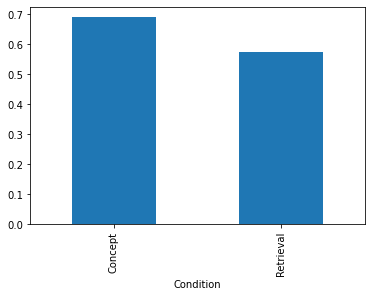

In [2]:
# YOUR CODE HERE
meanPerCondition = df.groupby("Condition")["PR.2"].mean()
meanPerCondition.plot.bar()

**YOUR EXPLANATION HERE**
The Concept group felt like they would do better on a test one week later than the Retrieval group.

# Question 2

Which group actually did better on the follow-up learning test one week later? Make an appropriate visualization and explain what you see.

_Hint:_ Don't ask which variable you should use. That is for you to figure out. Read the codebook carefully (consulting the [original paper](http://science.sciencemag.org/content/331/6018/772), if necessary), make an informed decision, and explain your choice.

<AxesSubplot:xlabel='Condition'>

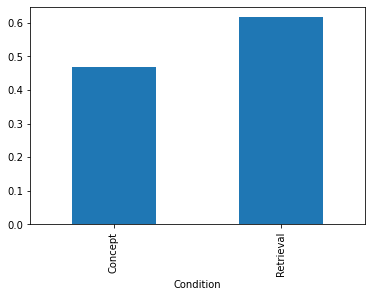

In [3]:
# YOUR CODE HERE
meanPerCondition = df.groupby("Condition")["TS.avg"].mean()
meanPerCondition.plot.bar()

**YOUR EXPLANATION HERE**
The Retrieval group actually did better on the follow-up learning test than the Concept group. Used the TS.avg column for how well both groups did on the test (avg. score between two scorers).

# Question 3

How good were subjects at predicting how well they would do on the follow-up learning test? Calculate a measure of how well subjects predicted their performance and interpret the value in context. (Optionally, you may want to include a visualization as well.)

5.538461538461537


<AxesSubplot:>

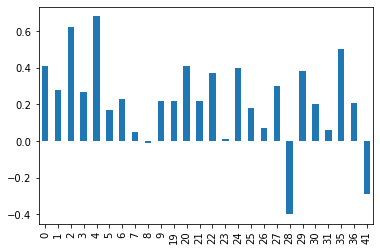

In [4]:
# YOUR CODE HERE
#Going to use Prediction - Test and take the mean of that.
PRConcept = df[df["Condition"] == "Concept"]["PR.2"]
TSConcept = df[df["Condition"] == "Concept"]["TS.avg"]
print((PRConcept - TSConcept).mean()*25)
(PRConcept - TSConcept).plot.bar()

-1.0


<AxesSubplot:>

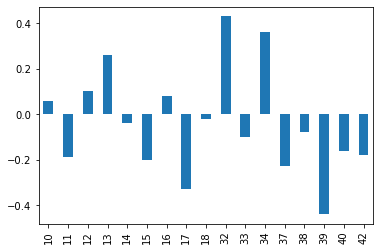

In [5]:
PRRetrieval = df[df["Condition"] == "Retrieval"]["PR.2"]
TSRetrieval = df[df["Condition"] == "Retrieval"]["TS.avg"]
print((PRRetrieval - TSRetrieval).mean()*25)
(PRRetrieval - TSRetrieval).plot.bar()

#diffPRTS = df["PR.2"] - df["TS.avg"]
#print(diffPRTS.mean() * 25) # 25 is the number of points possible in the test
#diffPRTS.plot.bar()

**YOUR EXPLANATION HERE**
Concept Subjects on average predicted that they would score 5.54 points higher than the average score between both tests they took a week later.
Retrieval Subjects on average predicted that they would score 1.0 points lower than the average score between both tests they took a week later.

# Question 4

This was a completely randomized experiment. This means that the condition that each subject was assigned to should be independent of their gender, age, and any other subject characteristics. Does that seem to be true in this case? Calculate a summary measure and/or make a visualization, and explain what you see.

Condition  Concept  Retrieval
Age                          
17               0          1
18              11          3
19               8          6
20               5          4
21               2          2
22               0          1


<AxesSubplot:xlabel='Age'>

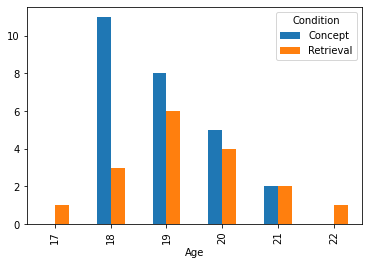

In [6]:
# YOUR CODE HERE
#Age Distribution
contTable = pd.crosstab(df["Age"], df["Condition"])
print(contTable)
contTable.plot.bar()
#age_counts = contTable.sum(axis=1)
#condition_given_age = contTable.divide(condition_counts, axis=0)
#print(condition_given_age)
#condition_given_age.plot.bar()

Condition  Concept  Retrieval
Gender                       
Female           9         12
Male            17          5


<AxesSubplot:xlabel='Gender'>

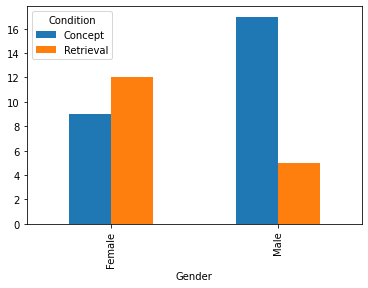

In [7]:
contTable = pd.crosstab(df["Gender"], df["Condition"])
print(contTable)
contTable.plot.bar()

**YOUR EXPLANATION HERE**
There are noticeably more male patients in the Concept category than the retrieval category.
The age distribution of the Retrieval group is unimodal, while the age distribution of the Concept group is skewed to the right.
Also, the age distribution between either the concept and retrieval is only from 17-22 year olds, so the scope of this experiment may not be beyond young adults.

# Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.
2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.
2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)
3. Upload the PDF to Gradescope and Notebook (ipynb) to iLearn.